Viewing Sample data and performing Preprocessing if required

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("/Users/ani/Desktop/Python_Project/WDC Bike Sharing EDA /day.xls")
print(df.head())
print(df.isnull().sum())

   instant       Date  Season  Year  Month Holiday    Weekday Workingday  \
0        1 2011-01-01  Spring  2011      1      No   Saturday         No   
1        2 2011-01-02  Spring  2011      1      No     Sunday         No   
2        3 2011-01-03  Spring  2011      1      No     Monday        Yes   
3        4 2011-01-04  Spring  2011      1      No    Tuesday        Yes   
4        5 2011-01-05  Spring  2011      1      No  Wednesday        Yes   

               Weather       Temp     Atemp  Humidity  Windspeed  Casual  \
0          Mist/Cloudy  14.110847  18.18125   80.5833  10.749882     331   
1          Mist/Cloudy  14.902598  17.68695   69.6087  16.652113     131   
2  Clear/Partly Cloudy   8.050924   9.47025   43.7273  16.636703     120   
3  Clear/Partly Cloudy   8.200000  10.60610   59.0435  10.739832     108   
4  Clear/Partly Cloudy   9.305237  11.46350   43.6957  12.522300      82   

   Registered  Total Rented  
0         654           985  
1         670           80

Summary of the dataset

In [ ]:
df.info()
df.describe()


Checking for outliers in the dataset and exploring the patterns in rentals of bike for CASUAL and REGISTERED users with respect to different Weather conditions, Weekdays or Holidays and different Seasons

***** For Casual Users *****


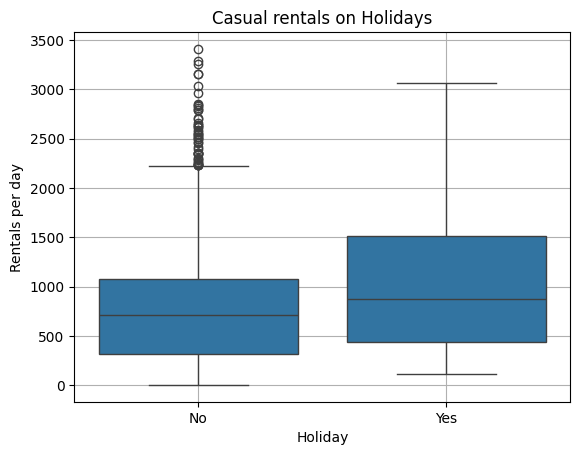

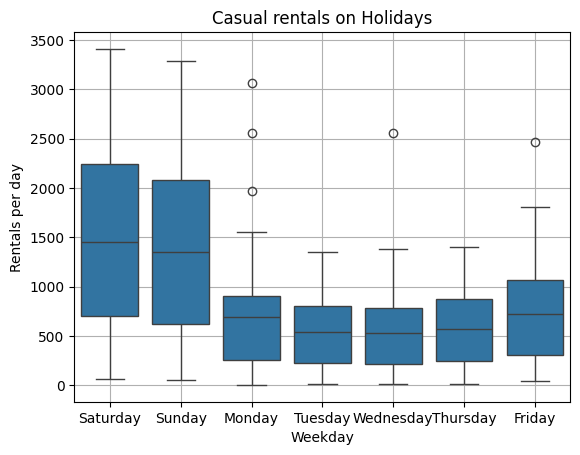

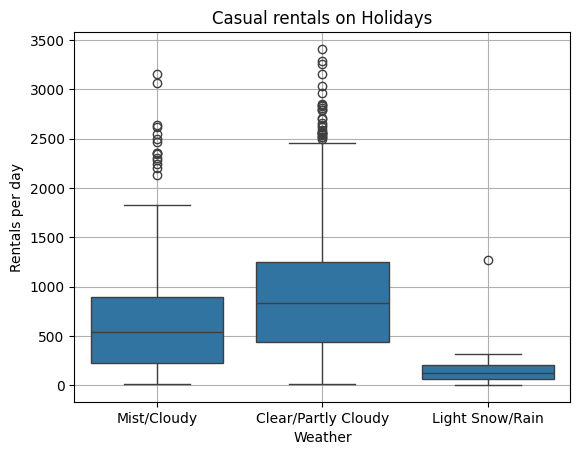

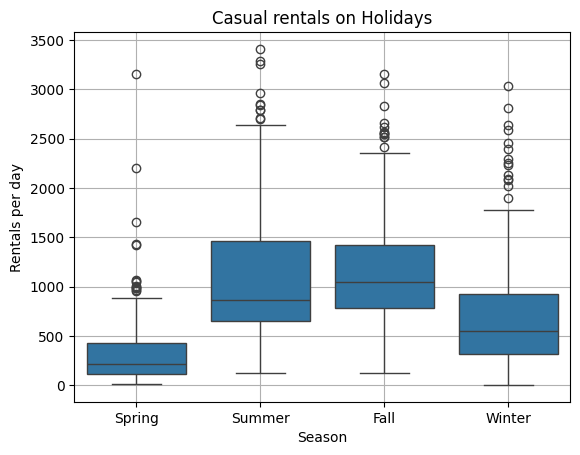

***** For Registered Users *****


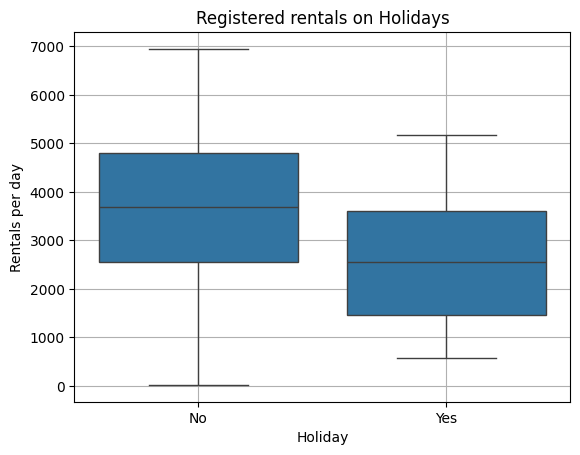

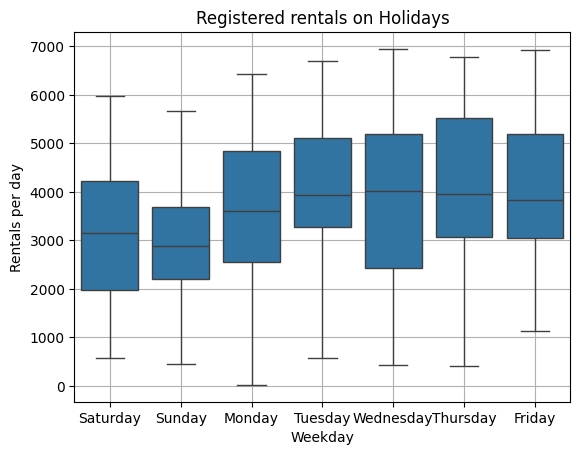

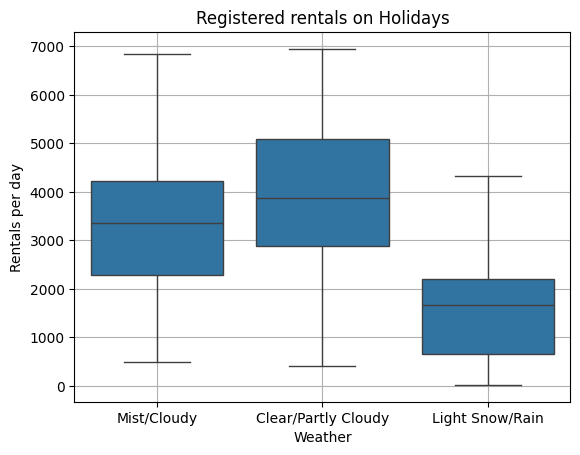

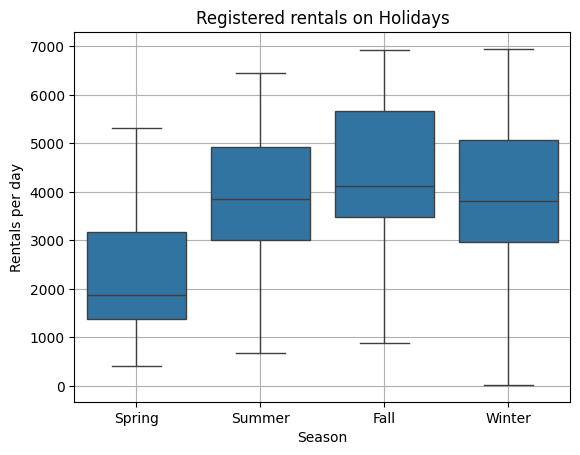

In [ ]:
# For Casual users

print("***** For Casual Users *****")

for xaxis in ["Holiday", "Weekday", "Weather", "Season"]:

    sns.boxplot(data=df, x = xaxis, y = "Casual" )

    plt.xlabel(xaxis)
    plt.ylabel("Rentals per day")
    plt.title("Casual rentals on Holidays")
    plt.grid()
    plt.show()


# For Registered Users

print("***** For Registered Users *****")

for xaxis in ["Holiday", "Weekday", "Weather", "Season"]:

    sns.boxplot(data=df, x = xaxis, y="Registered")
    plt.xlabel(xaxis)
    plt.ylabel("Rentals per day")
    plt.title("Registered rentals on Holidays")
    plt.grid()
    plt.show()


BarPlot

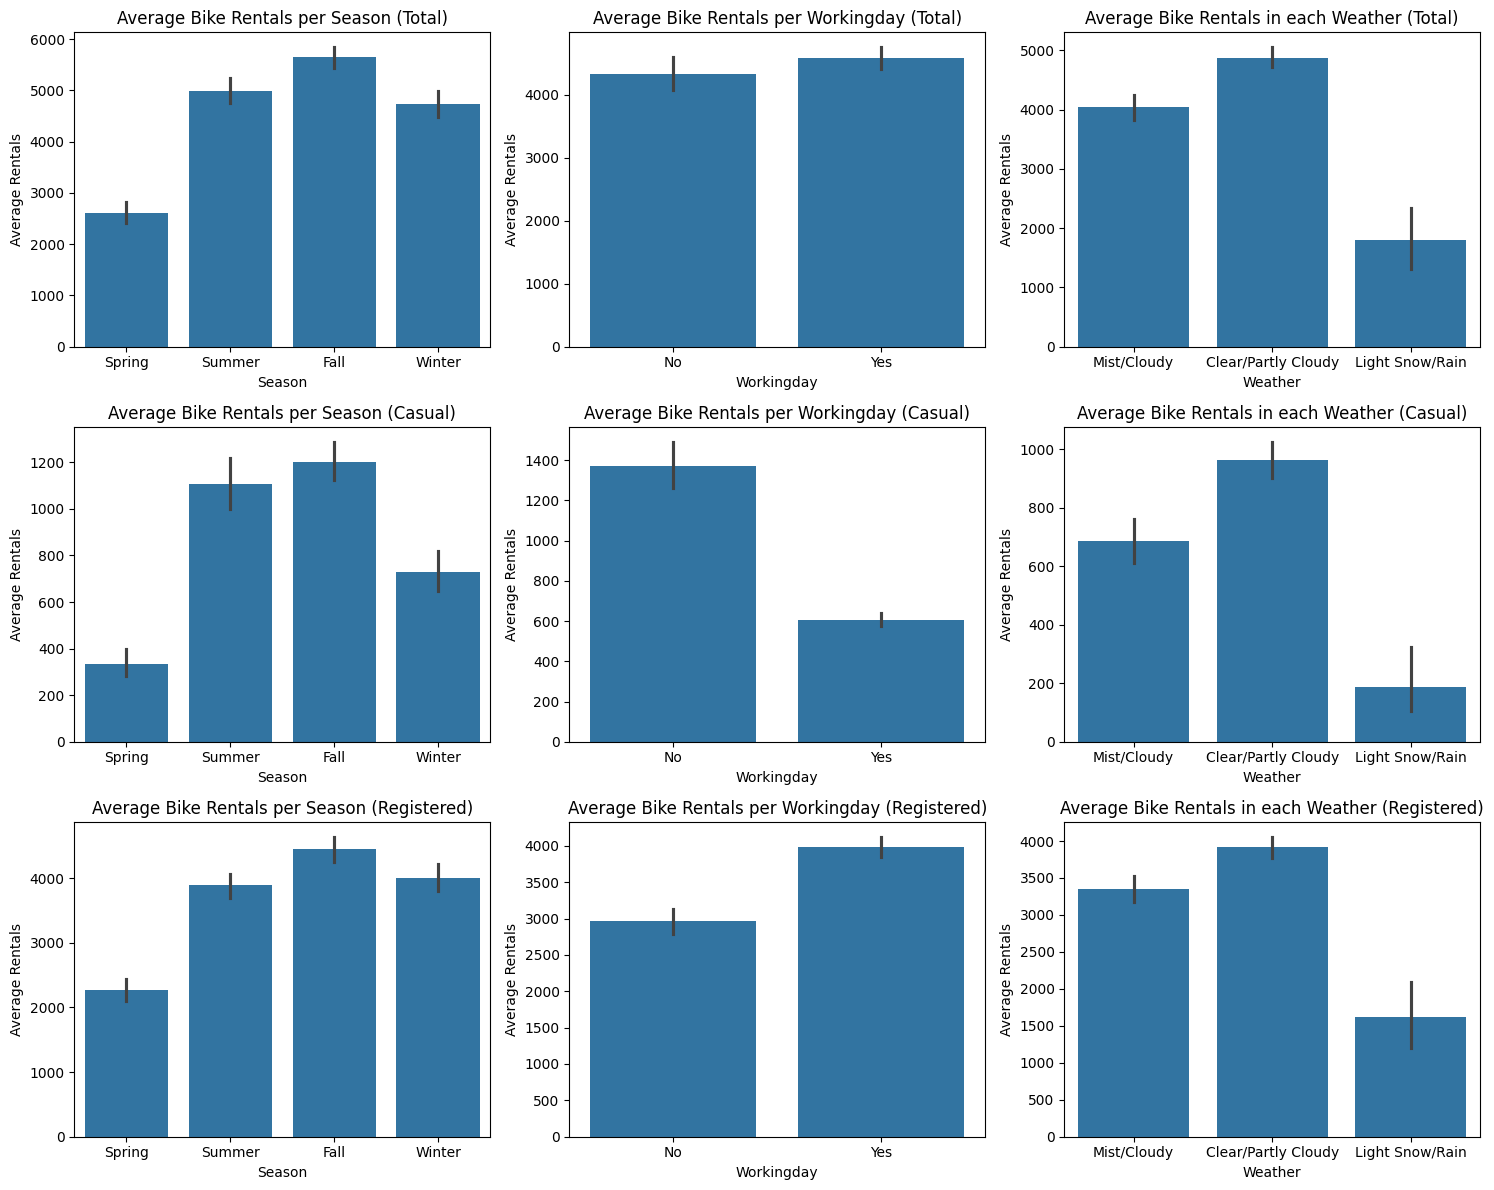

In [43]:


fig, axs = plt.subplots(3,3,figsize=(15, 12))

sns.barplot(data = df, x = "Season", y = "Total Rented", ax = axs[0,0])
axs[0,0].set_title('Average Bike Rentals per Season (Total)')
axs[0,0].set_xlabel("Season")
axs[0,0].set_ylabel('Average Rentals')
# plt.show()

sns.barplot(data = df, x = "Workingday", y = "Total Rented", ax = axs[0,1])
axs[0,1].set_title('Average Bike Rentals per Workingday (Total)')
axs[0,1].set_xlabel("Workingday")
axs[0,1].set_ylabel('Average Rentals')
# plt.show()

sns.barplot(data = df, x = "Weather", y = "Total Rented", ax = axs[0,2])
axs[0,2].set_title('Average Bike Rentals in each Weather (Total)')
axs[0,2].set_xlabel("Weather")
axs[0,2].set_ylabel('Average Rentals')
# plt.show()


sns.barplot(data = df, x = "Season", y = "Casual", ax = axs[1,0])
axs[1,0].set_title('Average Bike Rentals per Season (Casual)')
axs[1,0].set_xlabel("Season")
axs[1,0].set_ylabel('Average Rentals')
# plt.show()

sns.barplot(data = df, x = "Workingday", y = "Casual", ax = axs[1,1])
axs[1,1].set_title('Average Bike Rentals per Workingday (Casual)')
axs[1,1].set_xlabel("Workingday")
axs[1,1].set_ylabel('Average Rentals')
# plt.show()

sns.barplot(data = df, x = "Weather", y = "Casual", ax = axs[1,2])
axs[1,2].set_title('Average Bike Rentals in each Weather (Casual)')
axs[1,2].set_xlabel("Weather")
axs[1,2].set_ylabel('Average Rentals')
# plt.show()


sns.barplot(data = df, x = "Season", y = "Registered", ax = axs[2,0])
axs[2,0].set_title('Average Bike Rentals per Season (Registered)')
axs[2,0].set_xlabel("Season")
axs[2,0].set_ylabel('Average Rentals')
# plt.show()

sns.barplot(data = df, x = "Workingday", y = "Registered",ax = axs[2,1])
axs[2,1].set_title('Average Bike Rentals per Workingday (Registered)')
axs[2,1].set_xlabel("Workingday")
axs[2,1].set_ylabel('Average Rentals')
# plt.show()

sns.barplot(data = df, x = "Weather", y = "Registered", ax = axs[2,2])
axs[2,2].set_title('Average Bike Rentals in each Weather (Registered)')
axs[2,2].set_xlabel("Weather")
axs[2,2].set_ylabel('Average Rentals')
# plt.show()

plt.tight_layout()
plt.show()

